In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
from urllib.request import urlopen, Request
import time

In [2]:
def headers_proxie():
    from random import randint
    proxies = [{ "https": 'http://188.165.16.230:3129'},
       { "https": 'http://188.165.16.230:3129'}]
    ## make sure to get proxies with low latency and high success rate, even if you have to cut down the number of proxies used

    user_agent = [
    ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246'],
    ['Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36'],
    ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36'],
    ['Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15.0) Gecko/20100101 Firefox/15.0.1'],
    ['Mozilla/5.0 (Linux; U; Android 4.2.3; he-il; NEO-X5-116A Build/JDQ39) AppleWebKit/534.30 (KHTML, like Gecko) Version/5.0 Safari/534.30'],
    ['Mozilla/5.0 (X11; U; Linux armv7l like Android; en-us) AppleWebKit/531.2+ (KHTML, like Gecko) Version/5.0 Safari/533.2+ Kindle/3.0+'],
    ['Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.36'],
    ['Mozilla/5.0 (iPhone; CPU iPhone OS 12_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/69.0.3497.105 Mobile/15E148 Safari/605.1']
    ]
    value_userag = randint(0,7)

    str_user = ','.join(user_agent[value_userag])



    proxies_rand = randint(0,1)

    headers = {
    'User-Agent': str_user,
    }
    return (headers,proxies[proxies_rand])

In [29]:
df = pd.DataFrame(columns=['price','adress','features','beds','bath','park','classs'])
page = 0
while page < 50:
    if(page == 0): 
        url = 'https://www.domain.com.au/rent/cronulla-nsw-2230'
    else:
        url = 'https://www.domain.com.au/rent/cronulla-nsw-2230/?page='+str(page)
    headers,proxie = headers_proxie()
    try:
        req = Request(url=url, headers=headers)
        html = urlopen(req).read()
    except:
        print('page not read')
        break
    soup = BeautifulSoup(html, 'html.parser')
    soup.find('ul',{'class':'css-8tedj6'})
    apartments=soup.find_all('li',{'class':'css-1b4kfhp'})
    for apart in apartments:
        try:
            price = apart.find('div',{'data-testid':'listing-card-price-wrapper'}).text
            #div data-testid="listing-card-features-wrapper"
            features = apart.find('div',{'data-testid':'property-features'}).text
            #span data-testid="property-features-feature" class="css-1ie6g1l"
            beds = apart.find_all('span',{'class':'css-1ie6g1l'})[0].text
            bath = apart.find_all('span',{'class':'css-1ie6g1l'})[1].text
            park = apart.find_all('span',{'class':'css-1ie6g1l'})[2].text
            #div class="css-11n8uyu"
            classs = apart.find('div',{'class':'css-11n8uyu'}).text
            try:
                adress = apart.find('a').find('img')['alt']
            except:
                adress = apart.find('a').text
        except:
            price = None
            features = None
            beds = None
            bath = None
            park = None
            classs= None
            adress = None
        new_row = {'price':price,'adress': adress,'features' : features,'beds' : beds, 'bath' : bath,'park' : park, 'classs' : classs}
        df = df.append(new_row, ignore_index=True)
    print(url)
    page = page + 1
    time.sleep(5)



https://www.domain.com.au/rent/cronulla-nsw-2230
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=1
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=2
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=3
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=4
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=5
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=6
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=7
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=8
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=9
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=10
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=11
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=12
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=13
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=14
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=15
https://www.domain.com.au/rent/cronulla-nsw-2230/?page=16
https://www.domain.com.au/rent/c

In [30]:
df.to_csv('cronulla.csv')

In [9]:
df.head()

,price,adress,features,beds,bath,park,classs
0,.css-mgq8yx{max-width:100%;text-overflow:ellip...,"Picture of 38 Crescent Road, MONA VALE NSW 2103",.css-18biwo{display:-webkit-inline-box;display...,.css-1rzse3v{font-weight:bold;margin-left:6px;...,1 Bath,1 Parking,.css-693528{max-width:100%;text-overflow:ellip...
1,$950 per week,"Picture of 2/3 Barbara Court, MONA VALE NSW 2103",3 Beds1 Bath2 Parking,3 Beds,1 Bath,2 Parking,Duplex
2,None,None,None,None,None,None,None
3,Holding Deposit Received,MONA VALE NSW 2103,2 Beds1 Bath− .css-12a1b0h{position:absolute;w...,2 Beds,1 Bath,− .css-12a1b0h{position:absolute;width:1px;hei...,House
4,$675,"188A Narrabeen Park Parade, MONA VALE NSW 2103",2 Beds1 Bath− Parking,2 Beds,1 Bath,− Parking,Apartment / Unit / Flat


In [42]:
df1 = pd.read_csv('manly.csv')
df2 = pd.read_csv('bondii.csv')
df3 = pd.read_csv('coogee.csv')
df4 = pd.read_csv('vaucluse.csv')
df5 = pd.read_csv('curl-curl.csv')
df6 = pd.read_csv('mona-vale-nsw-2103.csv')
df7 = pd.read_csv('maroubra.csv')
df8 = pd.read_csv('cronulla.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [43]:
print(df.shape)
print(df.drop_duplicates().shape)

(4702, 8)
(4377, 8)


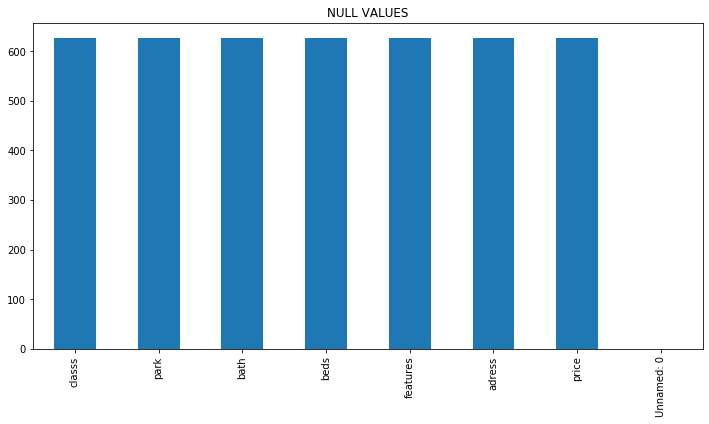

In [44]:
df.isnull().sum().sort_values(ascending = False).plot.bar(figsize=(12,6), title = 'NULL VALUES');

In [45]:
df = df[df.price.notnull()]
df.reset_index(inplace=True)

In [46]:
df['weekly_rent'] = df.price.str.replace('[^0-9.]','')
df['weekly_rent']=pd.to_numeric(df['weekly_rent'],errors='coerce')
df['bedrooms'] = df.beds.str.replace('[^0-9.,]','')
df['bedrooms']=pd.to_numeric(df['bedrooms'],errors='coerce')
df['bathrooms'] = df.bath.str.replace('[^0-9.,]','')
df['bathrooms']=pd.to_numeric(df['bathrooms'],errors='coerce')
df['parkings'] = df.park.str.replace('[^0-9.,]','')
df['parkings']=pd.to_numeric(df['parkings'],errors='coerce')
df = df[df['bedrooms'].notnull()]
df['parkings'].fillna(0,inplace=True)
#df.iloc[20:]['bedrooms'].head(20)

In [47]:
df['adress'] = df.adress.str.replace('Picture of','')
df['adress'] = df.adress.str.replace('[0-9]+/','')
df2 = pd.DataFrame(df['adress'].str.split(',').tolist(), index= df.index)
df2

,0,1,2,3
0,1 Carlton street,MANLY NSW 2095,None,None
1,49 North Steyne,MANLY NSW 2095,None,None
2,2 Denison Street,MANLY NSW 2095,None,None
3,37 The Crescent,MANLY NSW 2095,None,None
4,53 East Esplanade,MANLY NSW 2095,None,None
...,...,...,...,...
4071,Unit 230 Princes Highway,SYLVANIA NSW 2224,None,None
4072,108 Kingsway,WOOLOOWARE NSW 2230,None,None
4073,Kara Karook Street,MAIANBAR NSW 2230,None,None
4074,375 Kingsway,CARINGBAH NSW 2229,None,None


In [48]:
df2.reset_index(inplace=True)
index = df2[df2[2].notnull()].index
df2.loc[index,1] = None
df['neigh'] = df2[1]

In [53]:
df = df[df.neigh.notnull()]
df = df[['price','weekly_rent','classs',  'bedrooms', 'bathrooms', 'parkings', 'adress', 'neigh']]
df = df[df['bedrooms'] < 7]
df = df[~((df['bathrooms'] > 3) & (df['weekly_rent'] < 500)) ]
df = df[df['parkings'] < 5]
df = df[~df['weekly_rent'].isna()]
df = df[(df['weekly_rent']<2000) & (df['weekly_rent']>200)]
df.reset_index(inplace=True, drop=True)
df

,price,weekly_rent,classs,bedrooms,bathrooms,parkings,adress,neigh
0,$1900 Per week,1900.0,House,3.0,3.0,1.0,"1 Carlton street, MANLY NSW 2095",MANLY NSW 2095
1,$1290 per week,1290.0,Apartment / Unit / Flat,2.0,2.0,1.0,"49 North Steyne, MANLY NSW 2095",MANLY NSW 2095
2,"$1,250 pw",1250.0,Apartment / Unit / Flat,2.0,2.0,1.0,"2 Denison Street, MANLY NSW 2095",MANLY NSW 2095
3,$1150 per week,1150.0,Apartment / Unit / Flat,3.0,1.0,1.0,"37 The Crescent, MANLY NSW 2095",MANLY NSW 2095
4,"$1,100 per week",1100.0,Apartment / Unit / Flat,3.0,1.0,0.0,"53 East Esplanade, MANLY NSW 2095",MANLY NSW 2095
...,...,...,...,...,...,...,...,...
3031,$750 Per week,750.0,Apartment / Unit / Flat,2.0,1.0,1.0,"13-15 Gerrale Street, CRONULLA NSW 2230",CARINGBAH NSW 2229
3032,$750 per week,750.0,Apartment / Unit / Flat,3.0,2.0,0.0,"1-5 Richmount Street, CRONULLA NSW 2230",WOOLOOWARE NSW 2230
3033,$750 per week,750.0,Apartment / Unit / Flat,1.0,1.0,1.0,CRONULLA NSW 2230,SYLVANIA NSW 2224
3034,$750 per week,750.0,Apartment / Unit / Flat,3.0,2.0,2.0,"10 Searl Road, CRONULLA NSW 2230",WOOLOOWARE NSW 2230


In [54]:
key = 'your_key'
import gmaps
import googlemaps

def lat_lon(row):
    adress = row['adress']
    try:
        gmaps = googlemaps.Client(key=key)
        geocode_result = gmaps.geocode(adress)
        row['lat'] = geocode_result[0]['geometry']['location'] ['lat']
        row['lon'] = geocode_result[0]['geometry']['location']['lng']
        print(row['lat'],row['lon'], row.index)
    except:
        row['lat'] = None
        row['lon'] = None
        print('error')
    return row

In [55]:
#df = df.iloc[:100]
df2 = df.apply(lat_lon, axis=1)


-33.7929453 151.2863456 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7961886 151.2873478 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7942311 151.2863879 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7988204 151.2790835 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7992552 151.2848917 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7986195 151.2840171 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.799491

From cffi callback <function _verify_callback at 0x000001FFD8991D38>:
Traceback (most recent call last):
  File "C:\Users\SantiagoRush\anaconda3\lib\site-packages\OpenSSL\SSL.py", line 311, in wrapper
    @wraps(callback)
KeyboardInterrupt


error
-33.789347 151.2862356 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7976401 151.2866065 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7948212 151.2849004 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7944769 151.2849071 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.805014 151.2888802 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8048284 151.28477 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7985

-33.7980111 151.2813384 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.798464 151.2805503 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.797976 151.2810861 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7890369 151.2856433 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7984087 151.2790379 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7965523 151.2868699 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7995325 

-33.7455221 151.2589045 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7722612 151.287477 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8021335 151.254802 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8042 151.2692516 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.781188 151.2682421 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.75983110000001 151.2766008 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.76992

-33.7945007 151.2660969 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7912981 151.2533478 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7918593 151.262306 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7640692 151.2699401 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.77379 151.2657369 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7737488 151.2603621 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.755119 15

-33.8935068 151.2473215 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8912542 151.2464646 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8897712 151.251577 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8944511 151.2455596 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8934035 151.2534594 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8949694 151.2517693 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8925813

-33.8933398 151.248816 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8933398 151.248816 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.88919 151.2566655 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8917943 151.2467437 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8908152 151.2520953 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8894237 151.2566838 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8945 151.2

-33.8914115 151.2707309 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8789404 151.2768969 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8891245 151.2756383 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8820096 151.2317391 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8894993 151.2360881 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8829667 151.2280831 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.897430

-33.9012161 151.2569788 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9012161 151.2569788 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8815468 151.2269306 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8856686 151.23393 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8830529 151.2523003 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.88720310000001 151.2391912 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8

-33.8874487 151.2705652 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8927164 151.2304637 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8828172 151.2389141 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8811393 151.2272306 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8932596 151.2615208 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8823483 151.2330495 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.892160

-33.8736714 151.2481492 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8865703 151.2633227 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8824797 151.220525 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8841998 151.276601 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9039112 151.258654 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8973869 151.2624667 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8880217 1

-33.9017788 151.253654 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.885335 151.2359401 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8975559 151.2714079 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8912845 151.2306045 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8868566 151.2388816 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8887396 151.2333657 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8865028 

-33.8841634 151.2286637 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8871567 151.2242638 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9032594 151.2548281 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8885481 151.2581721 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8850025 151.2674243 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8919526 151.2309902 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.88615 

-33.8894387 151.2406315 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8850086 151.2719773 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9011419 151.2544262 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8881128 151.2430972 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8826296 151.219192 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8880336 151.2593458 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8843368

-33.8917224 151.2632325 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8882974 151.2779519 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8864052 151.2731538 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8913935 151.2626395 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.894589 151.2663769 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.884159 151.2764182 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8957292 

-33.8869198 151.2337455 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8868066 151.2774891 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8854449 151.2396845 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8835728 151.2222961 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8815722 151.2705652 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8880682 151.2735364 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.905001

-33.8927164 151.2304637 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8888098 151.2636416 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8916886 151.283644 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.888615 151.2597244 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8907851 151.2634136 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8948062 151.2601799 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9039887 

-33.8922425 151.2592917 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8946789 151.2669813 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8942582 151.2297794 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8946408 151.2716053 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9029969 151.25465 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8822762 151.2196878 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8906937 

-33.8903951 151.2291777 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.88209250000001 151.220266 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8925411 151.2305701 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8890619 151.2753481 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8797059 151.2241554 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8815863 151.2222276 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.

-33.9197212 151.2507289 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9150276 151.2494764 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9267951 151.2590904 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9208951 151.2555455 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9249292 151.2472447 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.91691 151.251452 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9203968 1

-33.9124176 151.2587653 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.917441 151.2507972 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9191796 151.2473672 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9172866 151.2593145 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9133336 151.2498863 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9260021 151.250524 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9211308 

-33.941154 151.2417163 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9532376 151.251822 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9099459 151.2631405 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.92128 151.2405016 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9391542 151.2391608 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9040736 151.2489071 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9104634 15

-33.9133468 151.2370431 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9040736 151.2489071 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9399669 151.2297111 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9103695 151.2410508 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9039684 151.2481784 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9130499 151.2634822 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.916298

-33.9400097 151.2308297 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9077134 151.2348429 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9411627 151.2283617 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.910427 151.2515971 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9136069 151.2417452 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9003227 151.2554999 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9097572

-33.9403832 151.2375555 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9488657 151.246015 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9107821 151.2365421 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9236093 151.2451952 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9084624 151.2400716 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.920025 151.2430845 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9432695 

-33.9052108 151.2553519 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9074946 151.2337073 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9407035 151.235175 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9137644 151.2457198 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9096092 151.240732 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9189251 151.2411129 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9066649 

-33.9425431 151.2274041 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9063217 151.2635049 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9088556 151.2357224 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9426939 151.2153896 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9059775 151.2583448 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9227351 151.2445853 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.904577

-33.9326256 151.2273886 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8982281 151.2643704 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9140483 151.2377991 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9024517 151.2544145 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.923584 151.2444665 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9521179 151.2404181 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9098743

-33.9455199 151.2395706 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9399446 151.2305237 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9090961 151.2356371 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8997628 151.2567183 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.921263 151.2417795 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9202744 151.2447854 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9420192

-33.909611 151.2548964 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9086379 151.2438289 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.943133 151.23929 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.940293 151.2385936 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9454054 151.2533429 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9410079 151.2387583 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9168413 151

-33.9349525 151.2308902 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9413916 151.2409173 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9415762 151.2405954 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9093233 151.2379642 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9109546 151.2375302 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9160477 151.2357224 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.943803

-33.9479234 151.2496002 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9538548 151.2489071 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9087139 151.2423889 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9207488 151.2482467 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9144343 151.2461972 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9036502 151.2597391 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.907323

-33.944589 151.2460834 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9117036 151.2389103 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8982679 151.2543726 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9336521 151.2369634 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9457784 151.2396845 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9402468 151.2328533 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9079494

-33.86399 151.2818543 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8616394 151.2803378 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8643526 151.2787487 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8580024 151.279949 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8581787 151.2832608 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8634033 151.2829556 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8634033 1

-33.8798029 151.2594967 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.884742 151.2592689 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8755591 151.263095 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8768164 151.2728711 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8765546 151.2718771 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8736338 151.2629128 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8768303 

-33.8771995 151.2389412 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8784096 151.2394548 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8745023 151.2448677 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8769448 151.2383627 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8858619 151.2558073 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8880217 151.2602726 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.871510

-33.8770603 151.2745282 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8705795 151.2712029 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8739092 151.2585629 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.876127 151.2601343 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8763384 151.2453774 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8891287 151.2593983 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8823865

-33.8767103 151.2392988 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8706818 151.277991 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8713207 151.274756 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8869866 151.2622068 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8859646 151.2603849 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.88615 151.2569886 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8723544 15

-33.7897812 151.2833872 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7980275 151.2822723 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7980275 151.2822723 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7980111 151.2813384 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.797976 151.2810861 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8043174 151.2844322 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8041231

-33.798464 151.2805503 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7963135 151.2864861 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.798793 151.286183 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7575232 151.2969921 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7947575 151.2816285 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7548585 151.2933977 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7939845 1

-33.7968626 151.2838161 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.75589739999999 151.2927387 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7549573 151.2831333 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7483605 151.2898091 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7568828 151.2968885 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8050929 151.2897889 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33

-33.7446691 151.2853034 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7984087 151.2790379 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7558308 151.2818303 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7394574 151.2711574 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7943124 151.2855339 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7587813 151.2684243 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.798011

-33.8022102 151.2878072 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7553388 151.2852961 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7965523 151.2868699 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7552027 151.2882856 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7621719 151.2662688 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7559229 151.296987 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.8023487

-33.6526915 151.3090651 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.6568135 151.3172619 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.6589854 151.3190389 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.6544154 151.3206824 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.7080043 151.2962581 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.6934135 151.2759403 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.685394

-33.95150539999999 151.2438289 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9367872 151.2369339 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9532376 151.251822 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9403832 151.2375555 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9410276 151.2396162 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9441497 151.2563271 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.

-33.9430741 151.2477457 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.948786 151.2484517 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9376413 151.2357089 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9409562 151.254031 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9397052 151.2385686 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9502669 151.2445349 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9407035 

-33.9438189 151.2606355 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9403832 151.2375555 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9425464 151.2406409 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9424269 151.2471055 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9455199 151.2395706 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9412424 151.2378885 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.943846

-33.9438383 151.2573559 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9406952 151.2364201 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9446926 151.2503418 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.940293 151.2385936 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9349525 151.2308902 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9400097 151.2308297 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9413916

-33.9425576 151.213616 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9155054 151.2352966 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9241019 151.2538261 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9139678 151.2643566 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9132955 151.2480851 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.91999870000001 151.2288151 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.

-33.9103221 151.2379821 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9100756 151.2410736 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9155902 151.2403677 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9527633 151.2266122 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9144107 151.244077 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9039684 151.2481784 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9264471

-33.91999870000001 151.2288151 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9067159 151.2335137 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9314016 151.2321323 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.913669 151.2369748 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.918304 151.2571054 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9232165 151.2293058 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9

-33.9524919 151.2283904 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9555408 151.2251864 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9182698 151.2488588 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9224625 151.2258749 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9246489 151.2562856 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9190029 151.2451497 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.906585

-33.9339389 151.236952 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9101607 151.2587508 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9309255 151.2565361 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9314506 151.2352195 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9620931 151.2447854 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9588147 151.2392747 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9721606

-33.9221549 151.2341285 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9109264 151.2452542 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9191807 151.2572122 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9191807 151.2572122 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9115443 151.2648714 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9191807 151.2572122 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.926924

-33.9040841 151.2486338 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9133468 151.2370431 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9540414 151.2261752 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.91859000000001 151.2569737 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.91999870000001 151.2288151 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.92128 151.2405016 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object'

-33.923265 151.2270243 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9526972 151.2298356 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9138497 151.2388648 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9234341 151.2318927 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9527633 151.2266122 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.91399639999999 151.2543875 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.

-33.9426939 151.2153896 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9553933 151.2277074 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9202027 151.2308496 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9219303 151.2244855 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9487675 151.227252 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.919812 151.2422863 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9131669 

-33.9098743 151.2391666 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9226438 151.2303942 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9544952 151.2298983 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.923584 151.2444665 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9759953 151.2400153 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9270016 151.2473814 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9049638

-33.9105801 151.2359046 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9234087 151.2323026 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9220126 151.2294501 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9234306 151.2550924 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9117181 151.2394934 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9154887 151.237704 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9097572

-33.907452 151.2528468 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9093233 151.2379642 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9096304 151.247814 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9322222 151.2309862 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9175701 151.2484744 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9821107 151.2328989 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-33.9627813 

-33.9060649 151.2483801 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0511141 151.1539376 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0499004 151.1551026 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0531403 151.1536557 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0618616 151.1546064 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0541075 151.1442566 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.045433

-34.0624536 151.1526808 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.05744 151.15219 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0528247 151.148689 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')
-34.0613371 151.151211 Index(['price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms', 'parkings',
       'adress', 'neigh', 'lat', 'lon'],
      dtype='object')


In [59]:
df2.to_csv('housesgeo.csv')

In [14]:
import pandas as pd
df2 = pd.read_csv('housesgeo.csv')
df2.shape

(3036, 11)

In [15]:
import geopandas as gpd
from shapely.geometry import Point, box
from random import uniform
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm

df2['point'] = [Point(x, y) for x, y in zip( df2['lon'].astype(float), df2['lat'].astype(float))]
df2.head()

,Unnamed: 0,price,weekly_rent,classs,bedrooms,bathrooms,parkings,adress,neigh,lat,lon,point
0,0,$1900 Per week,1900.0,House,3.0,3.0,1.0,"1 Carlton street, MANLY NSW 2095",MANLY NSW 2095,-33.792945,151.286346,POINT (151.2863456 -33.7929453)
1,1,$1290 per week,1290.0,Apartment / Unit / Flat,2.0,2.0,1.0,"49 North Steyne, MANLY NSW 2095",MANLY NSW 2095,-33.796189,151.287348,POINT (151.2873478 -33.7961886)
2,2,"$1,250 pw",1250.0,Apartment / Unit / Flat,2.0,2.0,1.0,"2 Denison Street, MANLY NSW 2095",MANLY NSW 2095,-33.794231,151.286388,POINT (151.2863879 -33.7942311)
3,3,$1150 per week,1150.0,Apartment / Unit / Flat,3.0,1.0,1.0,"37 The Crescent, MANLY NSW 2095",MANLY NSW 2095,-33.798820,151.279083,POINT (151.2790835 -33.7988204)
4,4,"$1,100 per week",1100.0,Apartment / Unit / Flat,3.0,1.0,0.0,"53 East Esplanade, MANLY NSW 2095",MANLY NSW 2095,-33.799255,151.284892,POINT (151.2848917 -33.7992552)


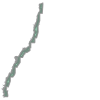

In [16]:
import geopandas as gpd
from shapely.geometry import Point, box
from random import uniform
from concurrent.futures import ThreadPoolExecutor
from tqdm.notebook import tqdm

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#single geom for Norway
Australia = world[world["name"]=="Australia"].dissolve(by='name').iloc[0].geometry
Australia

coastline = gpd.clip(gpd.read_file("new_south_wales/cstnswcd_r.shp").to_crs('EPSG:4326'),
                     Australia.buffer(0.25)).iloc[0].geometry
coastline2 = gpd.clip(gpd.read_file("new_south_wales/cstnswcd_l.shp").to_crs('EPSG:4326'),
                     Australia.buffer(0.25)).iloc[0].geometry
coastline

In [17]:
NSW_bounds = (146.9610352,-43.9526598,153.56946902894418,-30.668185723516686)

<AxesSubplot:>

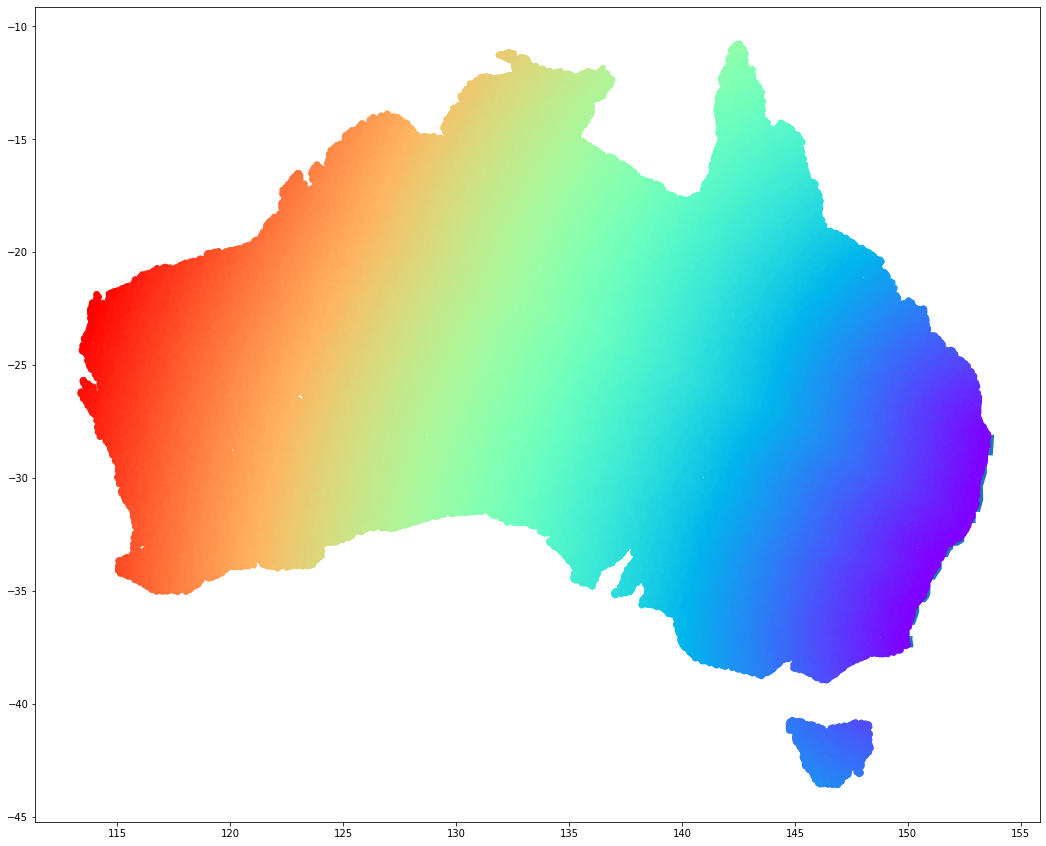

In [18]:
#single geom for the coastline
def make_point(id):
    point = None
    while point is None or not Australia.contains(point):
        point = Point(uniform(Australia.bounds[0],Australia.bounds[2]),
                      uniform(Australia.bounds[1],Australia.bounds[3]))
    return {"id": id, "geometry": point}

def compute_distance(point):
    point['dist_to_coastline'] = point['geometry'].distance(coastline)
    return point

with ThreadPoolExecutor(max_workers=4) as tpe:
    points = list(tpe.map(make_point, range(100000)))
    result = list(tpe.map(compute_distance, points))

gdf = gpd.GeoDataFrame.from_records(result)

ax = gpd.GeoDataFrame.from_records([{"geometry":coastline}]).plot(figsize=(18,18))
ax = gdf.plot(ax=ax, column='dist_to_coastline', cmap='rainbow')
ax

In [19]:
def distance_to_coastline (row):
    row['distance'] = row['point'].distance(coastline)
    return row
df2 = df2.apply(distance_to_coastline, axis=1)
df2['distance_m'] = df2['distance'] * 111139

In [20]:
df2['postcode'] = df2.neigh.str.replace('[^0-9.]','')
df2['postcode'].unique()

array(['2095', '2093', '2096', '2094', '2100', '2022', '2026', '2025',
       '2023', '2024', '2021', '2034', '2031', '2035', '2030', '2028',
       '2029', '2099', '2103', '2106', '2101', '2104', '2102', '2036',
       '2032', '2230', '2229', '2224', '2228', '2231'], dtype=object)

In [22]:
df2 = df2[~df2['lat'].isna()]
df2.columns

Index(['Unnamed: 0', 'price', 'weekly_rent', 'classs', 'bedrooms', 'bathrooms',
       'parkings', 'adress', 'neigh', 'lat', 'lon', 'point', 'distance',
       'distance_m', 'postcode'],
      dtype='object')

In [31]:
df2.head()
columns = [ 'classs','adress','postcode', 'bedrooms', 'bathrooms','parkings','distance_m','weekly_rent']
model = df2[columns]
model[[ 'classs','postcode', 'bedrooms', 'bathrooms','parkings','distance_m','weekly_rent']].to_csv('model.csv')
model.head()

,classs,adress,postcode,bedrooms,bathrooms,parkings,distance_m,weekly_rent
0,House,"1 Carlton street, MANLY NSW 2095",2095,3.0,3.0,1.0,63.947924,1900.0
1,Apartment / Unit / Flat,"49 North Steyne, MANLY NSW 2095",2095,2.0,2.0,1.0,35.458528,1290.0
2,Apartment / Unit / Flat,"2 Denison Street, MANLY NSW 2095",2095,2.0,2.0,1.0,79.877208,1250.0
3,Apartment / Unit / Flat,"37 The Crescent, MANLY NSW 2095",2095,3.0,1.0,1.0,91.949958,1150.0
4,Apartment / Unit / Flat,"53 East Esplanade, MANLY NSW 2095",2095,3.0,1.0,0.0,85.496880,1100.0


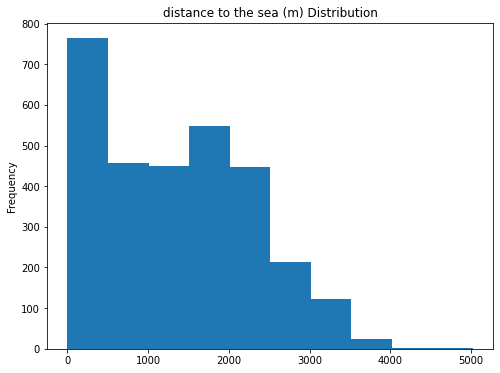

In [29]:
model['distance_m'].plot(kind='hist', title='distance to the sea (m) Distribution', figsize=(8,6));